In [ ]:
from strategy import DualReallocationStrategy
import vectorbt as vbt
import dffc
from dffc import process_hw_opt
import pickle

codes = ['007467', '004253']
names=['HL', 'GD']
start_date = '2019-07-01'
end_date = '2025-07-01'

try:
    fund_data = dffc.FundData.load('hlvsgd_all.pkl')
except FileNotFoundError:
    fund_data = dffc.FundData.download(
        codes,
        names=names,
        # start=start_date,
        end=end_date
    )

    fund_data.save('hlvsgd_all.pkl')

d:\anaconda3\envs\quant\Lib\site-packages\vectorbt\data\base.py:527: UserWarning:

Symbols have mismatching index. Setting missing data points to NaN.



In [ ]:
price_data = fund_data.get('cumulative_value').dropna()

In [19]:
try:
    with open('./hw_opt_results/hl_gd_19-22.pkl', 'rb') as f:
        opt_res = pickle.load(f)
except FileNotFoundError:
    opt_res = process_hw_opt(price_data, save=True, output_base_dir="./hw_opt_results", result_filename="hl_gd_19-22.pkl", plot=False)

Optimizing seasons for fund 007467: 100%|██████████| 18/18 [00:12<00:00,  1.39it/s]


  Fund 007467 processed! Parameters: Alpha=0.075424, Beta=0.000000, Gamma=0.116159, SeasonLength=15


Optimizing seasons for fund 004253: 100%|██████████| 18/18 [00:06<00:00,  2.99it/s]


  Fund 004253 processed! Parameters: Alpha=0.106921, Beta=0.001746, Gamma=0.227543, SeasonLength=19


In [20]:
fund_data = fund_data.update()
price_data = fund_data.get('cumulative_value').dropna()

In [21]:
strategy = DualReallocationStrategy(
    prices = price_data,
    adjust_factor=0.2,
    rebalance_freq='D',  # 日度再平衡
    default_weights = [0.5, 0.5],
    up_weights = [0.2, 0.8],
    down_weights= [0.8, 0.2], 
    threshold=0.6,
    hw_params_list = opt_res
)

In [22]:
portfolio, rebalance_mask, actual_weights = strategy.run_backtest(
    start_date="2023-01-01",
    end_date=None,
    initial_cash=10_000,
    fees=0.001,
    trade_delay=1
)

  007467 (007467): alpha=0.0754, beta=0.0000, gamma=0.1162, season=15
  004253 (004253): alpha=0.1069, beta=0.0017, gamma=0.2275, season=19
Total rebalancing count: 428
Applying T+1 trade delay...
Trade delay applied: T+1
Adjusted rebalancing count: 427
Running vectorbt backtest...


D:\Projects\quant\quant_dffc\dffc\strategies\base.py:308: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

D:\Projects\quant\quant_dffc\dffc\strategies\base.py:309: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




=== Rebalancing Strategy Performance Analysis ===
Total Return(%): 59.69
Sharpe Ratio: 1.76
Max Drawdown(%): -8.75

Detailed Statistics:
Start                           2023-01-03 00:00:00+08:00
End                             2025-09-18 00:00:00+08:00
Period                                  661 days 00:00:00
Start Value                                       10000.0
End Value                                    15969.342285
Total Return [%]                                59.693423
Benchmark Return [%]                            63.838265
Max Gross Exposure [%]                          99.999999
Total Fees Paid                                408.776969
Max Drawdown [%]                                 8.752921
Max Drawdown Duration                    92 days 00:00:00
Total Trades                                          428
Total Closed Trades                                   426
Total Open Trades                                       2
Open Trade PnL                                 -49

d:\Projects\quant\quant_dffc\wxy_backtest\hw_dual_reallocation\strategy.py:298: UserWarning:

Glyph 8599 (\N{NORTH EAST ARROW}) missing from font(s) Arial.

d:\Projects\quant\quant_dffc\wxy_backtest\hw_dual_reallocation\strategy.py:298: UserWarning:

Glyph 8600 (\N{SOUTH EAST ARROW}) missing from font(s) Arial.

d:\anaconda3\envs\quant\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8599 (\N{NORTH EAST ARROW}) missing from font(s) Arial.

d:\anaconda3\envs\quant\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8600 (\N{SOUTH EAST ARROW}) missing from font(s) Arial.



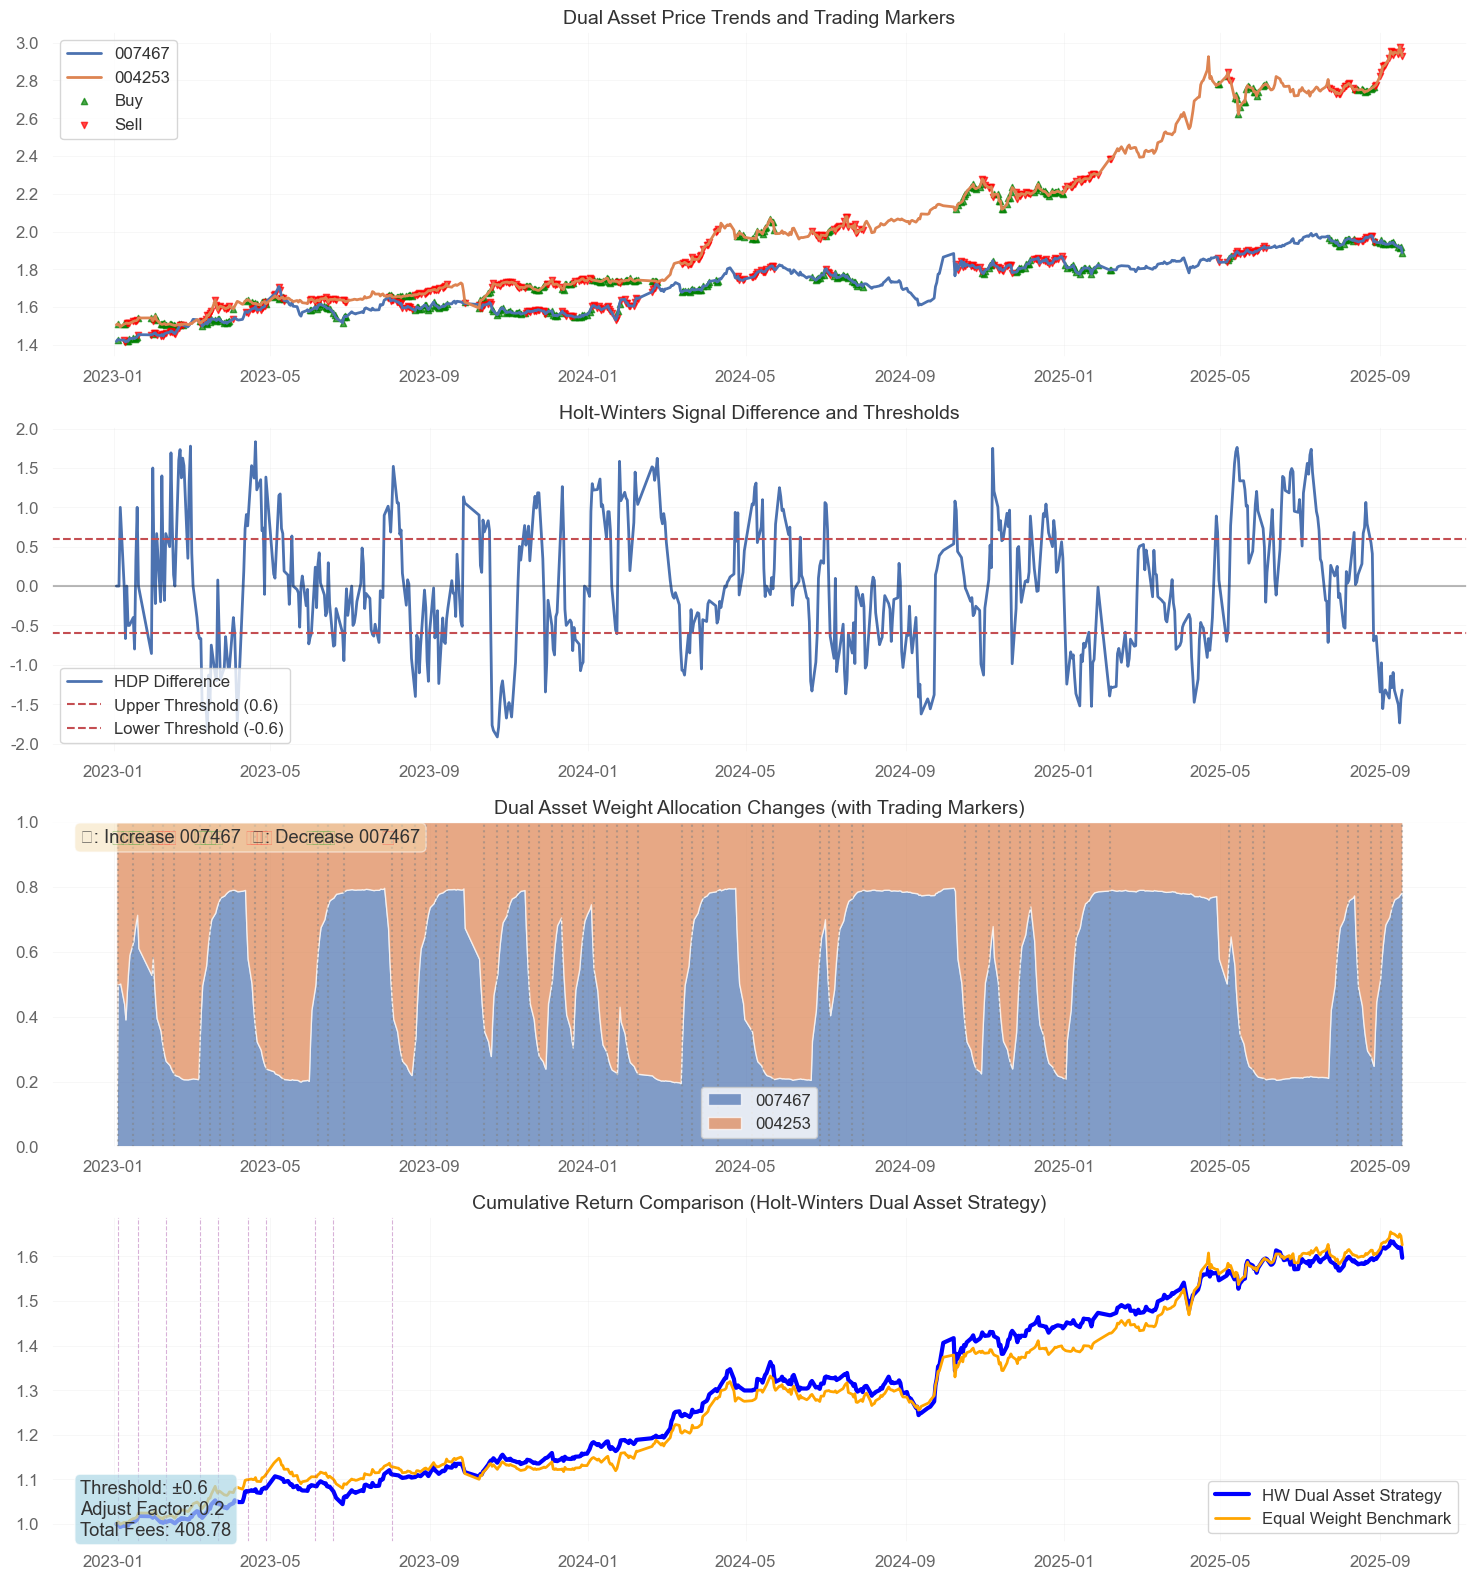

Signal distribution: Up 174 days (26.3%), Down 175 days (26.5%), Neutral 312 days (47.2%)
Rebalancing count: 427
Average rebalancing interval: 1.5 days


In [23]:
# 分析结果
stats = strategy.analyze_results(portfolio)

# 绘制结果
strategy.plot_results(portfolio, rebalance_mask)

In [7]:
portfolio.orders.side.mapping

{0: 'Buy', 1: 'Sell', -1: None}

In [8]:
strategy.hw_params_list

{'007467': {'alpha': np.float64(0.08854778376063509),
  'beta': np.float64(0.0),
  'gamma': np.float64(0.12328911770389557),
  'm': np.int64(24)},
 '004253': {'alpha': np.float64(0.07405796680165876),
  'beta': np.float64(0.005622364448150667),
  'gamma': np.float64(0.5038170013361442),
  'm': np.int64(15)}}